## TP6 : L'ensemble des codes aléatoires

Nous allons regarder ici un exemple de code particulier : l'ensemble de codes aléatoires. Ce code très simple, permet de saturer la borne de Shannon dans le théorème du codage de la source.
Le principe est le suivant : soit un ensemble de symboles (à transmettre) de taille $2^M$. On va attribuer à chaque élément de cet ensemble un code aléatoire dans $\{0,1\}^N$. Par exemple, si on a l'ensemble de 4 lettres 'a', 'b', 'c', 'd' (donc $2^M=4$ ou $M=2$) on pourra obtenir pour N=6

| symbole | code|
|:--:|:-----:|
|'a' | 001100|
|'b' | 101010|
|'c' | 111001|
|'d' | 000011|

Une fois le code créé, on peut l'envoyer dans un canal symmétrique binaire. Le décodage s'effectue de la façon suivante : une fois le messaege reçu, on va devoir trouver dans l'ensemble des mots-code (qui est ici un sous-espace de $\{0,1\}^N$) le mot-code le plus proche (i.e. celui pour lequel le nombre de bits retournés est le plus faible).

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

## <u>Première partie</u> : codage

On va faire une tentative d'implémentation d'un code aléatoire, avec transmission et décodage

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Commençons avec un cas facile : $f=0.1$, un ensemble de $2^3 = 8$ symboles codés dans un espace à $N=20$ dimensions.


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  1. Calculer le taux $R$

In [ ]:
# TODO

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [142]:
M = 3
N = 20
R = M/N
print("rate=", R)

rate= 0.15


<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

Dans le cours on a : $\log_2(M)/N$ où M est le nombre de symbole.

Mais ici on préfère comparer la taille du message en nombre de bits.
Donc dans ce TP M = nombre de bits pour coder les symboles ie log(#symbole)

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Commenez par générer un code aléatoire : 
  * on commence par attribuer un indice $i=1, ..., 2^3$ à chacun des symboles
  * pour chaque élément $i$, on génère une séquence aléatoire de $N$ bits ($0$ ou $1$), chacun avec probabilité 1/2.

In [143]:
# TODO

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [144]:
encoded = np.random.randint(low=0, high=2, size=(2**M, N))
for i in range(2**M):
    print("indice ",i," code=",encoded[i,:])

indice  0  code= [0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0]
indice  1  code= [0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0]
indice  2  code= [0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0]
indice  3  code= [1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1]
indice  4  code= [0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0]
indice  5  code= [1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1]
indice  6  code= [1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0]
indice  7  code= [0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0]


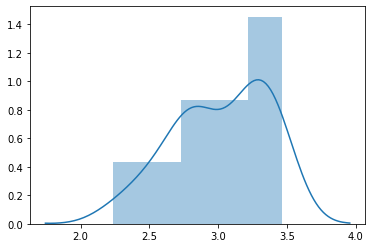

In [145]:
size = 2**M
distances = [ np.linalg.norm(encoded[i] - encoded[j]) 
            for i in range(size) for j in range(size) if i !=j]

sns.distplot(distances)
plt.show()

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

Pour la suite on reprendra la fonction de canal utilisée lors des tps précédent

In [146]:
# Fonction de transmission du canal (cf TP 3)
def Transmit(msg_enc, f):
    noise_vector = (np.random.random(msg_enc.shape) < f) * 1
    return (msg_enc + noise_vector) % 2

On peut maintenant utiliser la fonction **Transmit** pour récupérer le message altéré. Ici un exemple où l'on fait passer tous les symboles encodés par le canal:

In [147]:
f = 0.1
all_code_words = encoded
msg_received = Transmit(all_code_word, f=f)
for i in range(2**3):
    print("indice ", i, " code=", all_code_word[i,:], " *** received=", msg_received[i,:])

indice  0  code= [0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0]  *** received= [0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0]
indice  1  code= [1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1]  *** received= [1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1]
indice  2  code= [0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1]  *** received= [0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1]
indice  3  code= [0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1]  *** received= [1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
indice  4  code= [1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1]  *** received= [1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0]
indice  5  code= [0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1]  *** received= [0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1]
indice  6  code= [0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0]  *** received= [0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0]
indice  7  code= [0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1]  *** received= [0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1]


## <u> Deuxième partie </u> : inférence
Vous devez maintenant coder la fonction **inference** qui, à partir d'un message reçu et de l'ensemble des mots-code possibles, retourne le message inféré.
On peut procéder de la façon suivante : 

  * on donne comme argument : le message reçu et l'ensemble des mots-code.
  * il faut trouver parmi l'ensemble des mots-code, celui qui est le plus proche du message reçu.

Ensuite, écrire une fonction qui envoie tous les symboles possibles par le canal, les décoder et compter la proportion de messages correctement décodés.

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

In [148]:
def Inference(recieved_msg, all_code_words):
    # TODO
    return None


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [149]:
def Inference(recieved_msg, all_code_words):
    return all_code_words[np.argmin(np.linalg.norm(recieved_msg - all_code_words, axis=1)),:]


In [150]:
def ErrorAll(all_msg, all_code_words):
    err = 0
    recieved_msg = Transmit(all_msg, f=f)
    for i in range(recieved_msg.shape[0]):
        msg_dec = Inference(recieved_msg[i,:], all_code_words)
        #print(i," ",all_msg[i,:]," ",recieved_msg[i,:]," ",msg_dec)
        #print(i," ",(np.sum(msg_dec-all_msg[i,:])))
        if(np.sum(msg_dec - all_msg[i,:]) != 0):
            err += 1
    return err/all_msg.shape[0]

In [151]:
ErrorAll(all_code_words, all_code_words)

0.0

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Afin d'avoir une statique plus précise, générer un ensemble de $1000$ mots-code valident, et regarder la proportion d'erreur

In [152]:
# TODO

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [153]:
Nmsg = 10000
idx = np.random.randint(low=0, high=2**M, size=(Nmsg))
msg = np.zeros((Nmsg, N))
for i in range(Nmsg):
    msg[i,:] = encoded[idx[i], :]


In [154]:
ErrorAll(msg, all_code_words)

0.0127

In [155]:
from collections import Counter

In [156]:
errors = Counter()
Nmsg = 10000
for j in range(2**M):
    errors[j] = 0
    for i in range(Nmsg):
        msg = encoded[j]
        transmited = Transmit(msg, f=f)
        decoded = Inference(transmited, all_code_words)
        if np.sum(msg - decoded):
            errors.update([j])


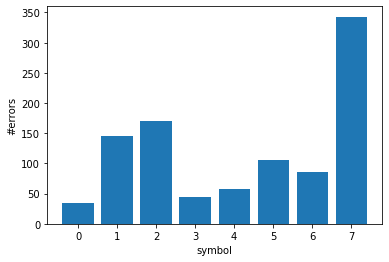

In [157]:
errors
plt.bar(errors.keys(), errors.values())
plt.ylabel('#errors')
plt.xlabel('symbol')
plt.show()

In [158]:
print("Error rate :", sum(errors.values())/(Nmsg * (2**M)) )

Error rate : 0.012325


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Tester quelques valeur de $M$ et $N$, en gardant $R$ fixé, afin comment évolue l'erreur lorsqu'on augmente les tailles des symboles et des mots-code dans une même proportion.


In [164]:
M = 3
N = 20
def compute_errors(N, M, Nmsg=1000):
    encoded = np.random.randint(low=0, high=2, size=(2**M, N))
    errors = Counter()
    for j in range(2**M):
        errors[j] = 0
        for i in range(Nmsg):
            msg = encoded[j]
            transmited = Transmit(msg, f=f)
            decoded = Inference(transmited, encoded)
            if np.sum(msg - decoded):
                errors.update([j])
    error_rate = sum(errors.values())/(Nmsg * (2**M))
    return error_rate


In [168]:
errors = {m : [compute_errors(n, m) for n in [10, 20, 30]] for m in [3, 5, 7]}
errors = pd.DataFrame(errors, index=[10, 20, 30])


In [169]:
errors

3         5         7
10  0.07725  0.163594  0.318344
20  0.00400  0.026469  0.074258
30  0.00075  0.002844  0.009875

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Que conclure sur la faisabilité de ce code ? 

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

Complexité du décodage :  $\mathcal{O}(N\times 2^M)$

## <u>Troisième partie</u> : théorie

Pour comprendre les performances du "Random Code Ensemble" (RCE), il faut se poser du nombre de mots-code présent à une certaine distance d'un mot-code donné. Considérons $x_0$, un mot-code. On cherche à calculer le nombre **moyen** de mots-code qui se trouverait à une distance $d$ de $x_0$. 

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Pour simplifier la question, on prendra $x_0 = 00...00$. 
  1. Quelle est la probabilité de générer une chaine de $N$ bits qui ont $k$ bits à 1.
  

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

**Rép** : $\text{binomial}(n, k, p) = C^k_N \times p^k (1-p)^k$

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  2. Sachant qu'on a au total $2^M$ mots-code, combien de mots-code ${\cal{N}(d)}$ (en moyenne) seront à une distance $d$ ($d$ bits retournés) de $x_0$ ?
  

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

**Rép** : $2^{M-1}  C^k_N$

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  3. En utilisant l'approximation de Stirling pour $N$ grand : ${\cal{C}}^k_N \approx 2^{NH_2(\delta)}$, où $H_2(\delta) = -\delta \log_2(\delta) - (1-\delta)\log_2(1-\delta)$ et $\delta=k/N$, montrer que l'on obtient dans la limite où $N$ est grand le résultat suivant : 
$${\cal{N}(d)} = 2^{N\left[R-1+H_2(\delta)\right]}$$


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

**Rép** : remplacer dans l'éq du 2)

$${\cal{N}(d)} = 2^{M-1} \times 2^{NH_2(\delta)}$$
$${\cal{N}(d)} = 2^{(M-1) + N H_2(\delta)}$$
$$ R = M/N $$
$${\cal{N}(d)} = 2^{N[(M/N-1/N) + H_2(\delta)]}$$
$${\cal{N}(d)} = 2^{N\left[R-1+H_2(\delta)\right]}$$


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  4. Tracer $R-1+H_2(\delta)$, en fonction de $\delta$ pour $R=0.5$. Que nous indique le fait que cette fonction soit négative ou positive ?
  

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

/home/estrade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/estrade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/home/estrade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until


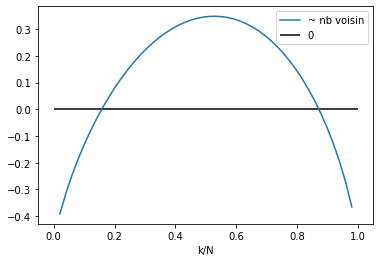

In [171]:
R = 0.5
def H_2(delta):
    res = -delta * np.log(delta) - (1-delta) * np.log2(1-delta)
    return res

x = np.linspace(0,  1, 50)
y = R - 1 + H_2(x)
plt.plot(x, y, label='~ nb voisin')
plt.hlines(0, 0, 1, label=0)
plt.xlabel('k/N')
plt.ylabel('')
plt.legend()
plt.show()

**Rép** : négative : un nombre de voisin exponentiellement faible is neg (pratique aucune chance d'en avoir un) au contraire, lorsque la courbe passe positive, on est pratiquement sûr d'en avoir un.

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  5. En déduire pour quelle valeur $f$ du canal, il est possible de décoder sans erreur à l'aide du RCE, lorsque $R=0.5$.
  

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

**Rép** : en gros, si $f<\delta_0$, où $\delta_0$ est la valeur de $\delta$ à laquelle la courbe passe négative, on peut décoder sans problème. Pourquoi ? le canal va flipper en moyenne $2^N * f$ bits, quand $N$ est grand les fluctuations sont petites par rapport à la valeur moyenne $m/\sigma \propto \sqrt{N}$ et donc si on risque de faire basculer un nombre de bits inférieur à la distance à laquelle on trouve un mot-code on est bon.